# Machine Learning 0 - Introduction

In this lab, we will introduce the classification problem that we will be working on for the last three labs. The objectives of the lab are:

* Examine the dataset and prepare the basic pipeline that will be used in the next lab.
* Make sure that we use a correct methodology for comparing the algorithms
* Get used to working with the [scikit-learn](https://scikit-learn.org/stable/) library.

## Important note

For the machine learning labs, **each student must write a report** (one report for all labs together) which will be used during the oral exam. This report should highlight the different methods used during the labs, but also how you validated each method and compared their results.

## Introduction to the dataset

The [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html) dataset has been collected by Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton. It consists of 60.000 32x32 colour images, split in 10 classes: 'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'.

*Reference: Learning Multiple Layers of Features from Tiny Images, Alex Krizhevsky, 2009.* PDF available at https://www.cs.toronto.edu/~kriz/learning-features-2009-TR.pdf

For the purpose of the INFO-H-501 laboratories, we will use a subset of those images by only taking 3 different classes: 'airplane', 'bird' and 'horse'.

[Click here to download](https://my.pcloud.com/publink/show?code=XZJUCPkZqiVxqtn8CXRB7D78YKt88RJvzWyk) the modified dataset. Extract the ZIP file and put the CIFAR10 folder in the same directory as the notebook.

The images are 32x32 8-bit **RGB**, and from these we extracted **Histogram of Gradient** vectors (16 orientations x 16 blocks = 256 values in HoG vector).

The following code pre-loads all of this data (make sure that you have the [lab_tools.py](https://github.com/odebeir/info-h-500-501/blob/master/LABS1/lab_tools.py) file in the same directory as the notebook, if you didn't clone the repository):

Pre-process  the dataset because the link dont work

In [ ]:
# because the download link doesn't work, I process the original dataset
import pickle
import numpy as np

dataset_path = "../data/cifar-10-batches-py"

def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

#load the dataset
for batch_nb in range(1, 6):
    batch = unpickle(f"{dataset_path}/data_batch_{batch_nb}")
    if batch_nb == 1:
        data = batch[b'data']
        labels = batch[b'labels']
    else:
        data = np.concatenate((data, batch[b'data']),axis=0)
        labels = np.concatenate((labels, batch[b'labels']),axis=0)

print("Data shape : ",data.shape)
print("Dataset :\n",data)

#save the data in npy format
data = np.array(data)
# hog = np.array([get_hog_image(data[i].reshape(3, 32, 32).transpose(1, 2, 0)) for i in range(data.shape[0])])
labels = np.array(labels)
np.save(f"{dataset_path}/images.npy", data)
# np.save(f"{dataset_path}/images_hog.npy", hog)
np.save(f"{dataset_path}/labels.npy", labels)

#load the test data
batch_test = unpickle(f"{dataset_path}/test_batch")
data_test = batch_test[b'data']
# hog_test = np.array([get_hog_image(data_test[i].reshape(3, 32, 32).transpose(1, 2, 0)) for i in range(data_test.shape[0])])
labels_test = batch_test[b'labels']
print("Test shape :",data_test.shape)
print("Test dataset :\n",data_test)
np.save(f"{dataset_path}/test_images.npy", data_test)
# np.save(f"{dataset_path}/test_images_hog.npy", hog_test)
np.save(f"{dataset_path}/test_labels.npy", labels_test)

Data shape :  (50000, 3072)
Dataset :
 [[ 59  43  50 ... 140  84  72]
 [154 126 105 ... 139 142 144]
 [255 253 253 ...  83  83  84]
 ...
 [ 35  40  42 ...  77  66  50]
 [189 186 185 ... 169 171 171]
 [229 236 234 ... 173 162 161]]
Test shape : (10000, 3072)
Test dataset :
 [[158 159 165 ... 124 129 110]
 [235 231 232 ... 178 191 199]
 [158 158 139 ...   8   3   7]
 ...
 [ 20  19  15 ...  50  53  47]
 [ 25  15  23 ...  80  81  80]
 [ 73  98  99 ...  94  58  26]]


Pre-loading training data
Pre-loading test data


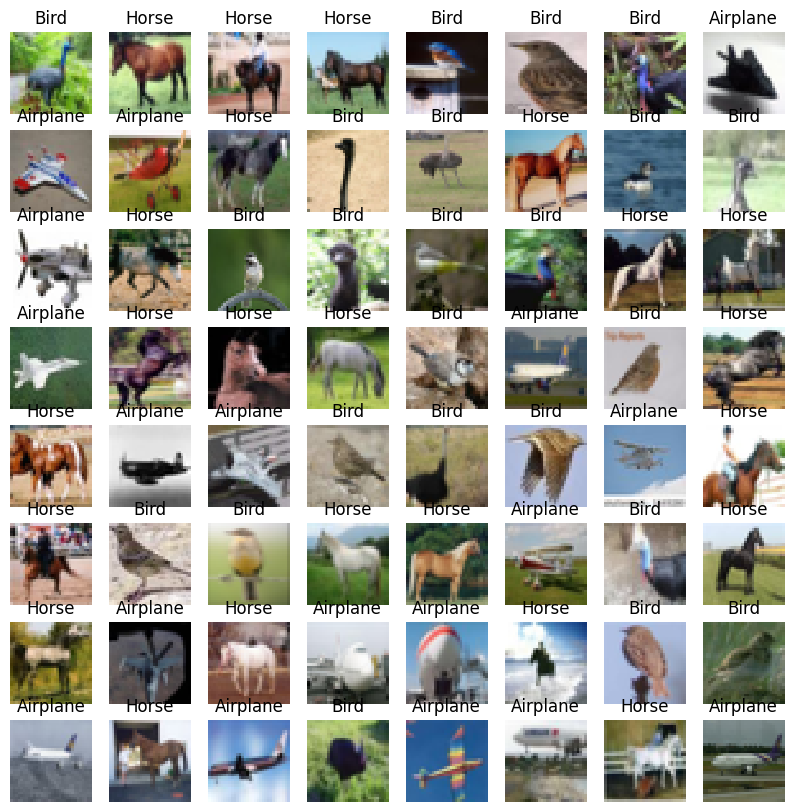

In [ ]:
from lab_tools import CIFAR10, get_hog_image
from matplotlib import pyplot as plt
import numpy as np

# dataset = CIFAR10_complete('../data/cifar-10-batches-py/')
dataset = CIFAR10('../data/CIFAR10/CIFAR10/')

plt.figure(figsize=(10,10))
for i in range(64):
    plt.subplot(8,8,i+1)
    plt.imshow(dataset.train['images'][i].reshape((32,32,3)), interpolation='none')
    plt.title(dataset.labels[dataset.train['labels'][i]])
    plt.axis('off')
plt.show()

We can also have a look at some HoG images:

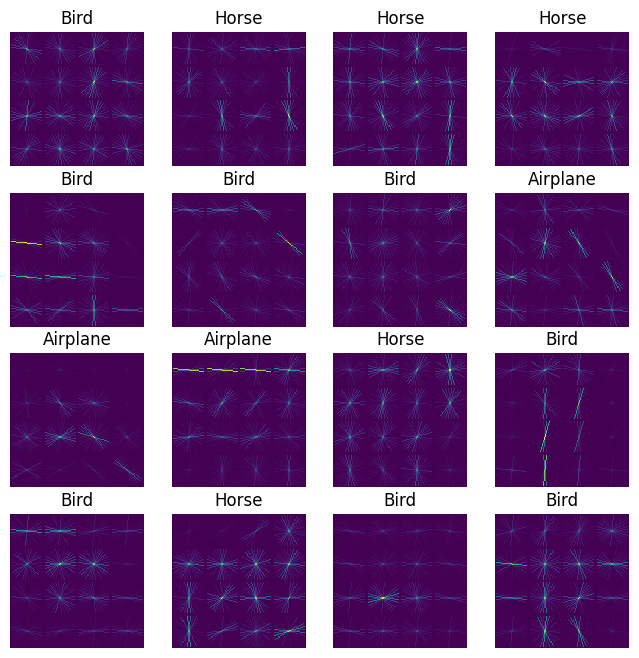

In [19]:
plt.figure(figsize=(8,8))
for i in range(16):
    plt.subplot(4,4,i+1)
    hog = dataset.train['hog'][i].reshape((4,4,16))
    plt.imshow(get_hog_image(hog, 128), interpolation='none')
    plt.title(dataset.labels[dataset.train['labels'][i]])
    plt.axis('off')
plt.show()

Note that this is an "image" representation of the HoG, but that the actual data that we will be working on is a size 256 vector for each image. Our **feature space** has therefore 256 dimensions. 

## Exploring the dataset

The *dataset* object gives you access to different attributes:

* *dataset.path* contains the path to the CIFAR10 folder.
* *dataset.labels* contains the name of the three classes
* *dataset.train* and *dataset.test* are dictionaries containing three numpy arrays each:
    * *images* contains the RGB images
    * *hog* contains the HoG vectors
    * *labels* contains the label for each image

In [20]:
print(dataset.path)
print(dataset.labels)
print(dataset.train.keys())
print(dataset.train['hog'].shape)

../data/CIFAR10/CIFAR10/
['Airplane', 'Bird', 'Horse']
dict_keys(['images', 'hog', 'labels'])
(15000, 256)


### Quick questions:

The dataset has already been split into a training set (dataset.train) and a test set (dataset.test).

* How many images are in the training set ?
* How many images are in the test set ?
* What is the class distribution of the dataset ?

In [39]:
import matplotlib.pyplot as plt
print(dataset.train['images'].shape)
print(dataset.test['images'].shape)
# class distribution in the dataset
for c in range(3):
    print(dataset.labels[c], (dataset.train['labels']==c).sum())
for c in range(3):
    print(dataset.labels[c], (dataset.test['labels']==c).sum())

(15000, 3072)
(3000, 3072)
Airplane 5000
Bird 5000
Horse 5000
Airplane 1000
Bird 1000
Horse 1000


### Descriptive data analysis

Look at the HoG data from the training set. What are the characteristics of the dataset ? Do you think that some pre-processing may be required to help with the different algorithms ?

(256,)


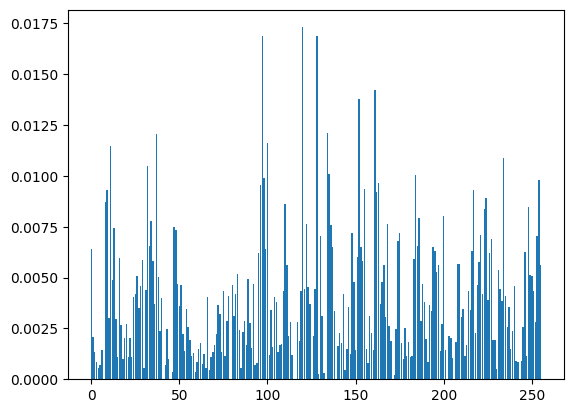

In [40]:
print(dataset.train['hog'][0].shape)
plt.figure()
plt.bar(range(256),dataset.train["hog"][0])
plt.show()

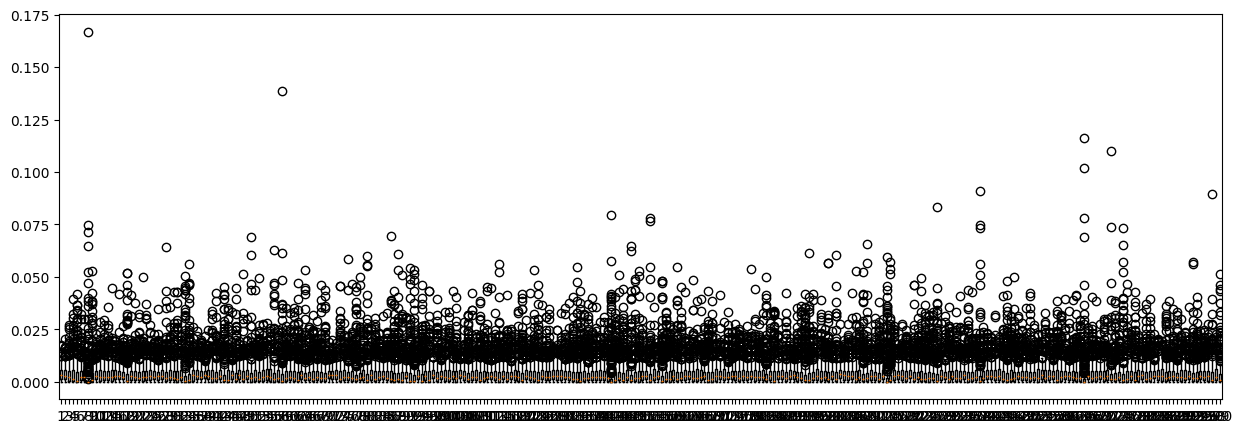

In [42]:
plt.figure(figsize=(15,5))
plt.boxplot(dataset.train["hog"][::50].T)
plt.show()

## Introduction to scikit-learn

[Scikit-learn](https://scikit-learn.org/stable/) is a very well documented machine learning library in Python. It contains many algorithms for [classification](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning), and makes the whole process of building a machine learning pipeline relatively straightforward. There are many examples in the documentation, as well as relatively complete theoretical explanations, so I really encourage you to take the time to read it if some things are not clear.

Let's make a very simple example. We are going to use the [Ridge Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html#sklearn.linear_model.RidgeClassifier), which is a very basic linear model.

In [22]:
from sklearn.linear_model import RidgeClassifier

To use a classifier with scikit-image, we generally have three steps:

* Create an instance of the class of the classifier (here: RidgeClassifier). The constructor will generally contain many arguments that can be modified, and that are explained in the documentation. There will also generally be default values for all of them, so in this simple example we will just use those:

In [23]:
clf = RidgeClassifier()

* Use the *fit* method with, as arguments, the training data (in our case, the HoG vectors) and the corresponding labels. This will start the main training algorithm, trying to fit the parameters of the classifier with the training data:

In [24]:
clf.fit(dataset.train['hog'], dataset.train['labels'])

RidgeClassifier()

* Use the *predict* method to get the prediction of the classifier on the data given as argument. In this case, we get the predictions on the data that was just used for training. **What kind of performance will that give us?**

In [25]:
pred = clf.predict(dataset.train['hog'])
print(pred.shape)

(15000,)


We can then evaluate those predictions. Scikit-learn provides many different [metrics](https://scikit-learn.org/stable/modules/model_evaluation.html) for evaluating the performances of a classifier. The most simple of those is the accuracy, which is simply the number of correct predictions divided by the total number of predictions:

In [ ]:
from sklearn.metrics import accuracy_score #in balanced datasets, accuracy is a good metric
# in unbalanced datasets, accuracy is not a good metric

score = accuracy_score(dataset.train['labels'], pred)
print(score)

# Not that it's fairly easy to compute that score "by hand":
T = (pred==dataset.train['labels']).sum()
print(T, len(pred), T/len(pred))

0.7356666666666667
11035 15000 0.7356666666666667


In a multiclass problem, it's often also very useful to look at the [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix), which gives us more information on which classes are often mistaken for each other:

In [27]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(dataset.train['labels'], pred)
print(cm)

[[3812  740  448]
 [ 742 3236 1022]
 [ 337  676 3987]]


Note that the rows represent the **true labels** and the columns the **predicted labels**. So this mean that, in this case, out of the 5000 images of class 0 ("Airplane"), 3812 were correctly classified, 740 were classified as "Bird" and 448 as "Horse").

### Quick question

* Modify the code to estimate the **predictive** performance of the algorithm (without using the test set).

In [ ]:
p_val = 0.1 # we take 10% of the training set for validation
n_val = int(p_val*len(dataset.train['hog'])) #number of validation samples
print(n_val)

train_X = dataset.train['hog'][:-n_val]
train_y = dataset.train['labels'][:-n_val]

val_X = dataset.train['hog'][-n_val:]
val_y = dataset.train['labels'][-n_val:]
print(train_X.shape, train_y.shape)
print(val_X.shape, val_y.shape)


1500
(13500, 256) (13500,)
(1500, 256) (1500,)


In [ ]:
clf = RidgeClassifier(alpha=0.1)
clf.fit(train_X, train_y)
pred = clf.predict(val_X)

pred_descr = clf.predict(train_X)
score = accuracy_score(train_y, pred_descr)
print(f"Descriptive: {score:.3f}")

score = accuracy_score(val_y, pred)
print(f"Predictive: {score:.3f}")

cm = confusion_matrix(val_y, pred)
print(cm)

print(cm.sum(axis=1)) # class distribution in the validation set is not uniform

Descriptive: 0.756
Predictive: 0.742
[[405  65  42]
 [ 67 330  93]
 [ 34  86 378]]
[512 490 498]


## How can we find the "best" algorithm?

What we have shown above served to illustrate how scikit-learn classifiers work, but we now have to build a valid machine learning pipeline to compare the different algorithms that we will use in the next labs.

As we have said earlier, we have already split the dataset into a "training" and a "test" set. It is clear that the final evaluation should take place on the test set.

But in addition to comparing the algorithms between each other, we also have to find the best "hyper-parameters" for each algorithm. For example, in our RidgeClassifier example, there is a regularization parameters, *alpha*, which by default was set to 1.0. Can we improve the performance of the algorithm by modifying this parameter ?

### Side-note: parameter vs hyper-parameter

In general, when talking about machine learning models, **parameters** are what the algorithm learns with the data (if we are for instance learning a linear regression y = ax+b, the "parameters" would be a and b), while **hyper-parameters** are modifiers to the model or to the pipeline (for instance, if we are generalizing to a polynomial regression, the degree of the polynome would be an hyper-parameter).

### Cross-validation

The most common way of finding the best hyper-parameters of a classifier is to use [cross-validation](https://scikit-learn.org/stable/modules/cross_validation.html).

* Using the [cross_val_score](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score) method from scikit-learn, find the best *alpha* hyper-parameter for the RidgeClassifier: 

In [ ]:
# cross-validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

clf = RidgeClassifier(alpha=0.1)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(clf, dataset.train['hog'], dataset.train['labels'], cv=skf)
print("List of scores :",scores)
print("Mean score of the 5 fold cross validation : ",scores.mean())

# find best alpha parameter
grid = GridSearchCV(clf, param_grid={'alpha': [alpha for alpha in np.arange(0.02, 0.14, 0.02)]}, cv=skf, scoring="accuracy")
grid.fit(dataset.train['hog'], dataset.train['labels'])
print("Best alpha :",grid.best_params_)
print(grid.best_score_) # Mean cross-validated score of the best_estimator

List of scores : [0.73333333 0.75366667 0.75233333 0.742      0.74633333]
Mean score of the 5 fold cross validation :  0.7455333333333334
Best alpha : {'alpha': 0.04}
0.7476666666666667


### Comparing algorithms

Once you have found the best hyper-parameters for an algorithm, you can re-train the classifier on the whole training set, and finally use the test set to get a "final performance". 

* How can you then decide which of the classifiers is best ?
* How can you decide if the different between two classifiers is significant ?

Try to compare the best RidgeClassifier with the original. Is it significantly better?

In [66]:
from sklearn.linear_model import LogisticRegression

clf = RidgeClassifier(alpha=0.04) #model with best parameters
clf.fit(dataset.train['hog'], dataset.train['labels'])
pred = clf.predict(dataset.test['hog'])
score = accuracy_score(dataset.test['labels'], pred)
print(f"Accuracy score (final performance) : {score:.4f}")
cm = confusion_matrix(dataset.test['labels'], pred)
print(cm)

log_reg = LogisticRegression(max_iter=1000, solver='saga', penalty='l2', C=1.0)
log_reg.fit(dataset.train['hog'], dataset.train['labels'])
pred_log = log_reg.predict(dataset.test['hog'])
score_log = accuracy_score(dataset.test['labels'], pred_log)
print(f"Accuracy score (final performance) : {score_log:.4f}")
cm_log = confusion_matrix(dataset.test['labels'], pred_log)
print(cm_log)

Accuracy score (final performance) : 0.7437
[[766 158  76]
 [124 672 204]
 [ 51 156 793]]
Accuracy score (final performance) : 0.7170
[[732 202  66]
 [130 655 215]
 [ 80 156 764]]


We can compare the performances using the paired t-test or the wilcoxon test. The paired t-test is a parametric test, and the wilcoxon test is a non-parametric test. In general, if the data is normally distributed, the t-test is preferred, otherwise the wilcoxon test should be used.

In [ ]:
from scipy.stats import ttest_rel, wilcoxon
scores_ridge = cross_val_score(clf, dataset.train['hog'], dataset.train['labels'], cv=skf)  # Accuracy scores for classifier A
scores_log = cross_val_score(log_reg, dataset.train['hog'], dataset.train['labels'], cv=skf)  # Accuracy scores for classifier B

print("Ridge scores: ", scores_ridge)
print("Mean Ridge score: ", scores_ridge.mean())
print("Logistic Regression scores: ", scores_log)
print("Logistic Regression mean score: ", scores_log.mean())

# paired t-test (good for normally distributed data)
t_stat, p_value = ttest_rel(scores_ridge,scores_log)
print(f"p-value: {p_value}")
if p_value < 0.05:
    print("The difference is statistically significant.")
else:
    print("The difference is not statistically significant.")

# wilcoxon test (but we prefer to use the t-test since the scores are normally distributed)
# don't use it in this case !!!
stat, p_value = wilcoxon(scores_ridge, scores_log)
print(f"Wilcoxon test statistic: {stat}, p-value: {p_value}")
if p_value < 0.05:
    print("The difference is statistically significant.")
else:
    print("The difference is not statistically significant.")


Ridge scores:  [0.73666667 0.75533333 0.756      0.74033333 0.75      ]
Mean Ridge score:  0.7476666666666667
Logistic Regression scores:  [0.697      0.71266667 0.72066667 0.709      0.71366667]
Logistic Regression mean score:  0.7106
p-value: 4.335563582047604e-05
The difference is statistically significant.
Wilcoxon test statistic: 0.0, p-value: 0.0625
The difference is not statistically significant.
